In [ ]:
import pandas as pd
import numpy as np
import pylab as p
import matplotlib.pyplot as plt
from collections import Counter
import re
import os
import seaborn as sns


In [ ]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

In [ ]:
df= pd.read_csv('/content/train_1.csv')

In [ ]:
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [ ]:
df.shape

(145063, 551)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26627 entries, 0 to 26626
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 111.9+ MB


In [ ]:
df.describe()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
count,2.202600e+04,2.195600e+04,2.199200e+04,2.197300e+04,2.195100e+04,2.197500e+04,2.196800e+04,2.203700e+04,2.199000e+04,2.197200e+04,...,2.572100e+04,2.588400e+04,2.587300e+04,2.586200e+04,2.567700e+04,2.571600e+04,2.574600e+04,2.569400e+04,2.583200e+04,2.571300e+04
mean,1.328448e+03,1.329746e+03,1.207692e+03,1.221040e+03,1.264195e+03,1.474449e+03,1.408005e+03,1.309918e+03,1.354879e+03,1.342758e+03,...,1.829794e+03,1.604394e+03,1.577530e+03,1.584052e+03,1.845339e+03,1.886014e+03,1.855190e+03,1.880299e+03,1.650667e+03,1.643546e+03
std,8.149634e+04,8.418341e+04,7.626656e+04,8.148952e+04,8.420710e+04,9.641248e+04,8.810752e+04,7.575827e+04,8.256093e+04,8.470253e+04,...,1.211929e+05,1.050412e+05,1.160239e+05,1.180793e+05,1.346884e+05,1.259564e+05,1.238935e+05,1.208453e+05,1.071738e+05,1.226206e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+01,1.000000e+01,1.000000e+01,1.100000e+01,1.100000e+01,8.000000e+00,1.000000e+01,1.100000e+01,1.300000e+01,1.200000e+01,...,1.200000e+01,1.400000e+01,1.100000e+01,1.300000e+01,1.200000e+01,1.300000e+01,1.500000e+01,1.500000e+01,1.300000e+01,1.200000e+01
50%,1.060000e+02,1.080000e+02,1.030000e+02,9.900000e+01,1.070000e+02,1.160000e+02,1.170000e+02,1.150000e+02,1.120000e+02,1.110000e+02,...,1.390000e+02,1.280000e+02,1.130000e+02,1.170000e+02,1.430000e+02,1.470000e+02,1.530000e+02,1.480000e+02,1.415000e+02,1.180000e+02
75%,4.657500e+02,4.662500e+02,4.450000e+02,4.340000e+02,4.760000e+02,5.020000e+02,4.900000e+02,4.950000e+02,4.920000e+02,4.870000e+02,...,6.510000e+02,6.150000e+02,5.560000e+02,5.740000e+02,6.550000e+02,6.820000e+02,6.757500e+02,6.640000e+02,6.550000e+02,5.710000e+02
max,1.195256e+07,1.234402e+07,1.119585e+07,1.198247e+07,1.237968e+07,1.416483e+07,1.291717e+07,1.108992e+07,1.206733e+07,1.243223e+07,...,1.858311e+07,1.663468e+07,1.855471e+07,1.891883e+07,2.147319e+07,2.006500e+07,1.975191e+07,1.921163e+07,1.710092e+07,1.959176e+07


In [ ]:
df.head(1000).isna().sum()

,0
Page,0
2015-07-01,65
2015-07-02,65
2015-07-03,67
2015-07-04,64
...,...
2016-12-27,9
2016-12-28,10
2016-12-29,9
2016-12-30,8


In [ ]:
df=df.dropna(how='all')
print(df.shape)
df=df.dropna(thresh=300)
print(df.shape)

(145063, 551)
(133617, 551)


1. We are trying dropping rows which have all values as nan, None in our case.
2. We then try dropping rows which have values for 300 days as nan, as their time series won't make much sense.
3. We fill all other nan values with 0 assuming there was no traffic on the date that the values are nan for.



In [ ]:
df=df.fillna(0)
df.tail()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
145012,Legión_(Marvel_Comics)_es.wikipedia.org_all-ac...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,3.0,2.0,4.0,2.0,4.0,4.0,1.0,2.0,2.0
145013,Referéndum_sobre_la_permanencia_del_Reino_Unid...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,16.0,8.0,3.0,6.0,3.0,3.0,10.0,11.0,3.0
145014,Salida_del_Reino_Unido_de_la_Unión_Europea_es....,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,29.0,36.0,23.0,182.0,43.0,8.0,22.0,13.0,18.0,14.0
145015,"Amar,_después_de_amar_es.wikipedia.org_all-acc...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,30.0,27.0,14.0,8.0,7.0,5.0,43.0,12.0,25.0
145016,Anexo:89.º_Premios_Óscar_es.wikipedia.org_all-...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
# Function to split and extract details from 'Page'
def split_page(Page):
    w = re.split('_|\.', Page)
    print(w)  # Optional: For debugging, remove if not needed
    return ' '.join(w[:5]), w[-5], w[-2], w[-1]

# Apply the function and create new DataFrame
li = list(df.Page.apply(lambda x: split_page(str(x))))  # Move this line outside the function
dfone = pd.DataFrame(li, columns=['Title', 'Language', 'Access_type', 'Access_origin'])

# Combine with original DataFrame
dfone = pd.concat([df, dfone], axis=1)


Streaming output truncated to the last 5000 lines.
['Macklemore', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Mad', 'Max', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Madrid', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Magdalena', 'Brzeska', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Magdalena', 'Neuner', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Maggie', 'Smith', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Maghreb', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Magic', 'Johnson', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Magnus', 'Carlsen', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Maisie', 'Williams', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Malente', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Malu', 'Dreyer', 'de', 'wikipedia', 'org', 'all-access', 'all-agents']
['Manchester', 'by', 'the', 'Sea', 'de', 'wikipedia', 'org', 'all-access', 'all-ag

In [ ]:
dfone.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Language,Access_type,Access_origin
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,14.0,20.0,22.0,19.0,18.0,20.0,2NE1 zh wikipedia org all-access,zh,all-access,spider
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,9.0,30.0,52.0,45.0,26.0,20.0,2PM zh wikipedia org all-access,zh,all-access,spider
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,4.0,4.0,6.0,3.0,4.0,17.0,3C zh wikipedia org all-access,zh,all-access,spider
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,16.0,11.0,17.0,19.0,10.0,11.0,4minute zh wikipedia org all-access,zh,all-access,spider
5,5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,...,32.0,19.0,23.0,17.0,17.0,50.0,A'N'D zh wikipedia org all-access,zh,all-access,spider


<Axes: xlabel='Language', ylabel='count'>

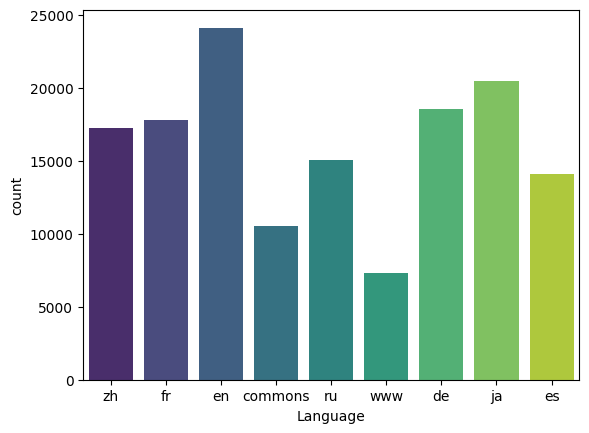

In [ ]:
sns.countplot(x=dfone['Language'],palette='viridis')

This shows that most articles are in English language(en), followed by Japenese(ja).

<Axes: xlabel='Access_type', ylabel='count'>

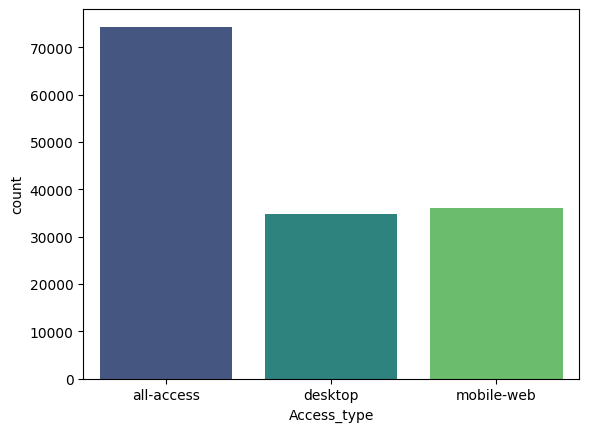

In [ ]:
sns.countplot(x=dfone['Access_type'],palette='viridis')

This shows that usage from mobile-web and desktop are almost the same.

<Axes: xlabel='Access_origin', ylabel='count'>

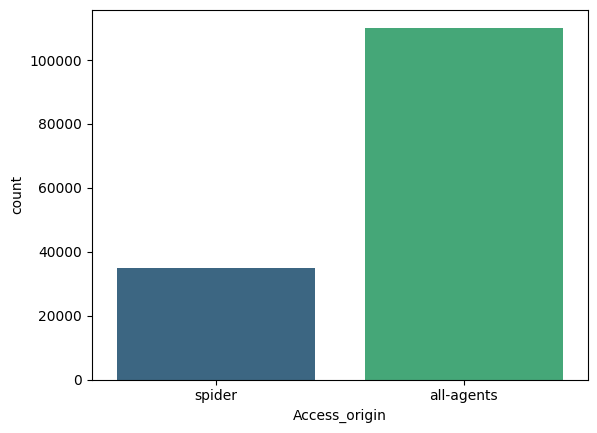

In [ ]:
sns.countplot(x=dfone['Access_origin'],palette='viridis')

This shows that organic views are far more than spider or bots

In [ ]:
#Checking another way of fetching language from the string
def lang(Page):
  val= re.search('[a-z][a-z].wikipedia.org',Page)
  if val:
    return val[0][0:2]

  return 'no_lang'

dfone['Language']=df['Page'].apply(lambda x: lang(x))


In [ ]:
dfone.groupby('Language').count()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31,Title,Access_type,Access_origin
Language,,,,,,,,,,,,,,,,,,,,,
de,17362,17362,17362,17362,17362,17362,17362,17362,17362,17362,...,17362,17362,17362,17362,17362,17362,17362,13046,13046,13046
en,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486,...,22486,22486,22486,22486,22486,22486,22486,22486,22486,22486
es,13551,13551,13551,13551,13551,13551,13551,13551,13551,13551,...,13551,13551,13551,13551,13551,13551,13551,10142,10142,10142
fr,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948,...,16948,16948,16948,16948,16948,16948,16948,16948,16948,16948
ja,19295,19295,19295,19295,19295,19295,19295,19295,19295,19295,...,19295,19295,19295,19295,19295,19295,19295,16140,16140,16140
no_lang,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494,...,14494,14494,14494,14494,14494,14494,14494,14494,14494,14494
ru,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270,...,14270,14270,14270,14270,14270,14270,14270,14270,14270,14270
zh,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211,...,15211,15211,15211,15211,15211,15211,15211,15211,15211,15211


In [ ]:
dfone.drop(['Title','Access_type','Access_origin','Page'],axis=1,inplace=True)

In [ ]:
dfone.set_index('Language', inplace=True)

In [ ]:
dfone.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Language,,,,,,,,,,,,,,,,,,,,,
zh,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
zh,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
zh,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
zh,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
zh,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0


In [ ]:
df_language= dfone.groupby('Language').mean().transpose()
df_language

Language,de,en,es,fr,ja,no_lang,ru,zh
2015-07-01,763.765926,3767.328604,1127.485204,499.092872,614.637160,102.733545,663.199229,272.498521
2015-07-02,753.362861,3755.158765,1077.485425,502.297852,705.813216,107.663447,674.677015,272.906778
2015-07-03,723.074415,3565.225696,990.895949,483.007553,637.451671,101.769629,625.329783,271.097167
2015-07-04,663.537323,3711.782932,930.303151,516.275785,800.897435,86.853871,588.171829,273.712379
2015-07-05,771.358657,3833.433025,1011.759575,506.871666,768.352319,96.254105,626.385354,291.977713
...,...,...,...,...,...,...,...,...
2016-12-27,1119.596936,6314.335275,1070.923400,840.590217,808.541436,155.270181,998.374071,363.066991
2016-12-28,1062.284069,6108.874144,1108.996753,783.585379,807.430163,178.561267,945.054730,369.049701
2016-12-29,1033.939062,6518.058525,1058.660320,763.209169,883.752786,150.873534,909.352207,340.526330
2016-12-30,981.786430,5401.792360,807.551177,710.502773,979.278777,156.049193,815.475123,342.745316


In [ ]:
df_language.reset_index(inplace=True)
df_language.set_index('index', inplace=True)

Text(0, 0.5, 'Views per Page')

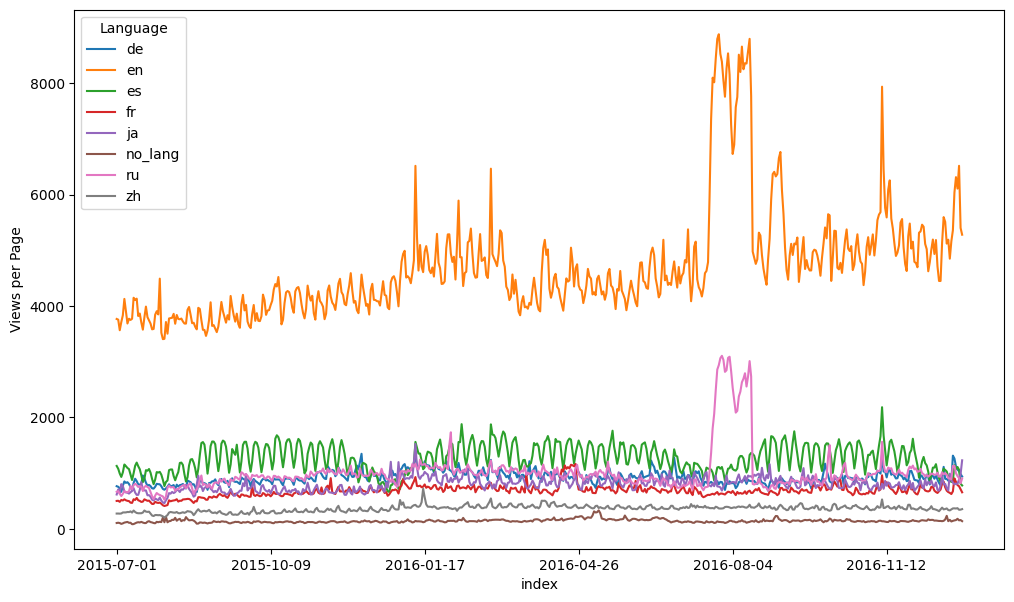

In [ ]:
df_language.plot(figsize=(12,7))
plot.ylabel('Views per Page')

Ploting the data shows that articles in english get the most number of views as compared to different languages, there are some spikes at different times in different laguages

Ploting just for english because we are going to use this for our furthur investigation and predictions

Text(0, 0.5, 'Views per Page')

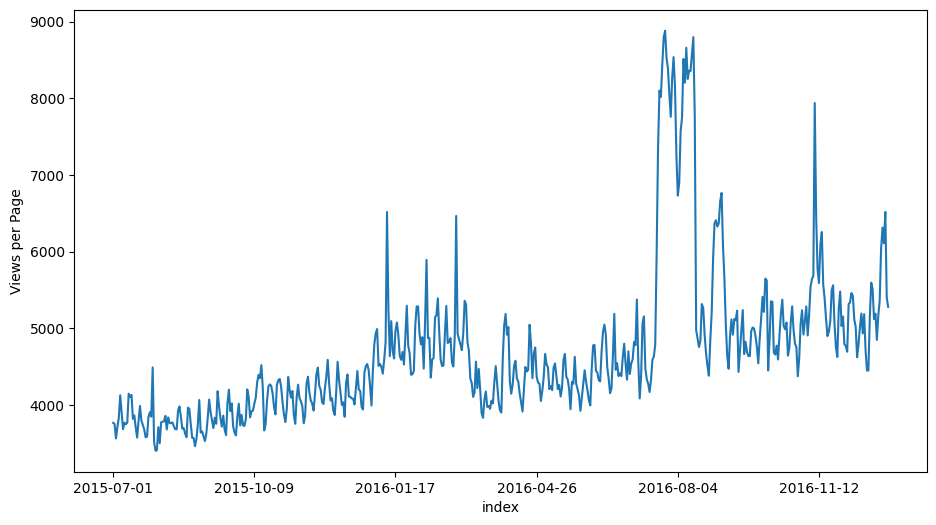

In [ ]:
df_language['en'].plot(figsize=(11,6))
plot.ylabel('Views per Page')

In [ ]:
total_view= df_language.copy()

#Checking for Stationarity

Using Dickey fuller test

Here null hypothesis is TimeSeries is non-stationary and alternate hypothesis is TimeSeries is stationary.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def df_test(x):
  result= adfuller(x)
  print('ADF Stastistic: %f'%result[0])
  print('p-value: %f'%result[1])

df_test(total_view['en'])

ADF Stastistic: -2.373563
p-value: 0.149337


We see that p-value 0.149337 is more than 0.05, this means our time series is non-stationary as we fail to reject the null hypothesis.

#Making the time series stationary

In [ ]:
ts=total_view['en']

## 1. Remove trend and seasonality with decomposition

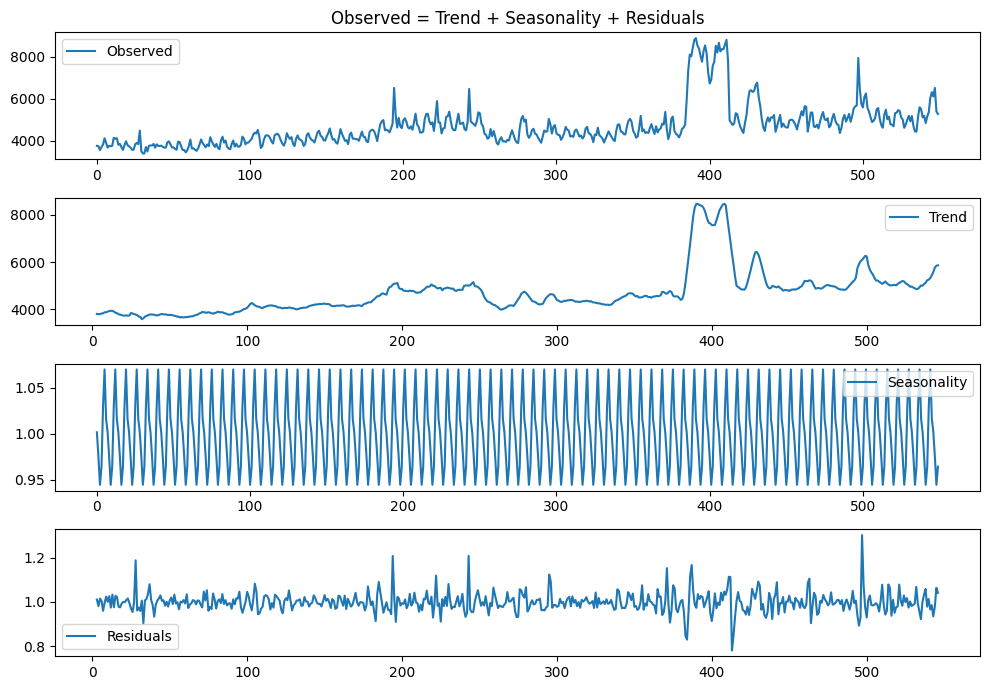

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts.values, model='multiplicative' , period= 7)

trend= decomposition.trend
seasonal= decomposition.seasonal
residual= decomposition.resid

plot.figure(figsize=(10,7))
plot.subplot(411)
plot.title('Observed = Trend + Seasonality + Residuals')
plot.plot(ts.values,label='Observed')
plot.legend(loc='best')
plot.subplot(412)
plot.plot(trend, label='Trend')
plot.legend(loc='best')
plot.subplot(413)
plot.plot(seasonal,label='Seasonality')
plot.legend(loc='best')
plot.subplot(414)
plot.plot(residual, label='Residuals')
plot.legend(loc='best')
plot.tight_layout()
plot.show()


In [ ]:
ts_decompose=pd.DataFrame(residual).fillna(0)[0].values
df_test(ts_decompose)


ADF Stastistic: -3.796320
p-value: 0.002945


We can see that our series is now stationary, we can also try diffrencing to see what results we can get.

# 2. Remove trend and seasonality with differencing

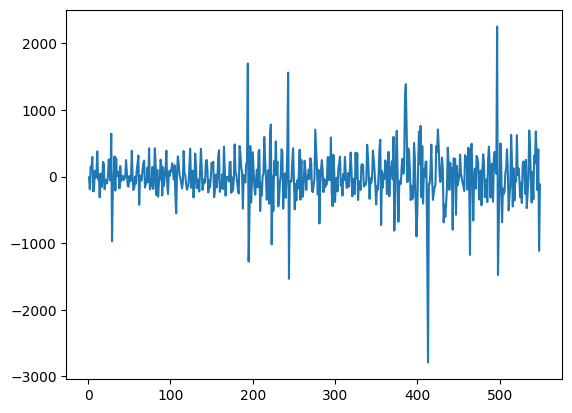

In [ ]:
ts_diff= ts- ts.shift(1)
plot.plot(ts_diff.values)
plot.show()

In [ ]:
ts_diff.dropna(inplace=True)
df_test(ts_diff)

ADF Stastistic: -8.273590
p-value: 0.000000


 Also the p value is 0. So we can say that our graph is now stationery.
Now we can apply the ARIMA model

# Plot the autocorreltaion and partial auto correlation functions

Plotting the graphs and getting the p,q,d values for arima

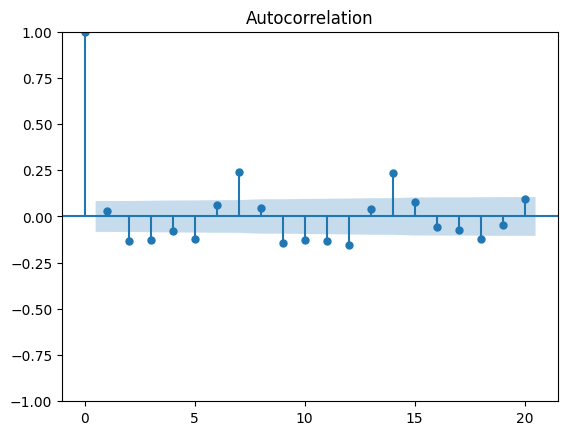

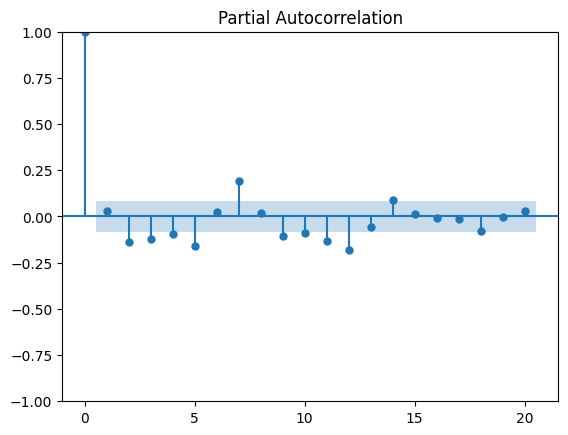

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(ts_diff,lags=20)
pacf=plot_pacf(ts_diff,lags=20)

**How p,d,q is chosen**

a thumb rule that for choosing the p,q values are when the lag goes below the significant level
- we use PACF for p, here we see that till lag 5 there are significat lines, if we want our model to be simpler we can start with a smaller number like 3/4
- we use ACF for q. here we can see that lag 4 is below significant level so we will use till lag 3


as for d we can see that at 1 diffencing the series becomes stationary so we choose d as 1

#ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pandas import DataFrame

In [ ]:
model= ARIMA(ts,order=(4,1,3))
model_fit= model.fit()

In [ ]:
ts.index = pd.to_datetime(ts.index)


**Multistep forecasting**

In [ ]:
train= ts[:-20]
test= ts[-20:]

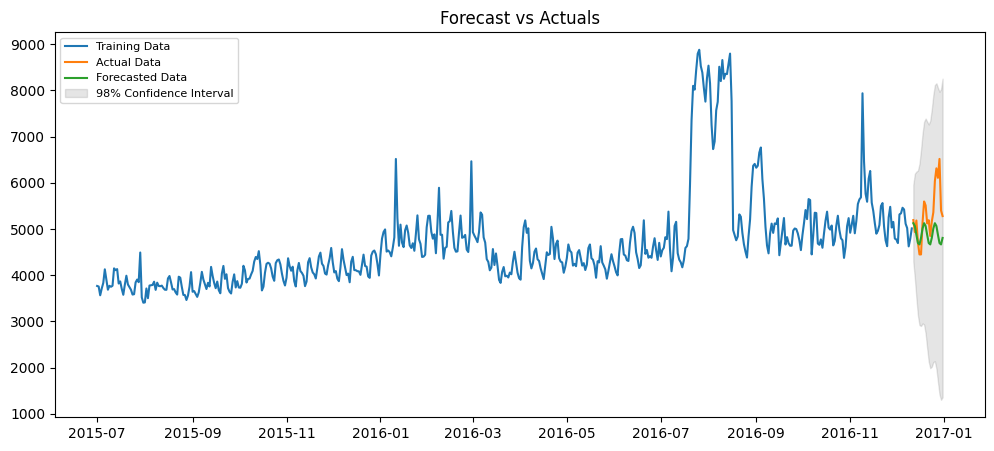

In [ ]:
# Fit the ARIMA model
model = ARIMA(train, order=(4, 1, 3))
fitted = model.fit()

# Forecast
forecast = fitted.get_forecast(steps=20)  # Forecast for 20 steps
fc = forecast.predicted_mean  # Forecasted values
conf = forecast.conf_int(alpha=0.02)  # Confidence intervals (98% confidence)

# Create forecast series
fc_series = pd.Series(fc, index=test.index)

# Plot
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Data')
plt.plot(fc_series, label='Forecasted Data')

# Plot confidence intervals
plt.fill_between(fc.index, conf.iloc[:, 0], conf.iloc[:, 1],
                 color='k', alpha=0.1, label='98% Confidence Interval')

plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import numpy as np
mape= np.mean(np.abs(fc-test)/np.abs(test))
rmse = np.mean((fc - test.values)**2)**.5
print('Mape: {}'.format(mape))
print("rsme:",rmse)

Mape: 0.08968868098614681
rsme: 682.637296334911


we can see that the model does not perform very well for multistep out sample data. Mape under 5% is acceptable but here it is 9% approx.

from the decomposition we can see that there is a weekly seasonality and still some spikes in the residual, that may be because of some external factors, which we can take into account by using them as our exogenous variable

In [ ]:
ex_df = pd.read_csv('/content/Exog_Campaign_eng')
ex_df.head()

,Exog
0,0
1,0
2,0
3,0
4,0


We get the exogenous data from this csv file for english pages

In [ ]:
exog=ex_df['Exog'].to_numpy()

we will train a sarimax model for that and see if we get anyimprovements from using the two information.

the seasonal order and the values of PDQ are based upon various trials and comparision of the models
- we see a seasonality of 7 from the plots ie: weekly seasonality ( from the plots we can see that afte some insignificant plots we have some significant values repeating at intervals of 7 ie: 7,14 ... )
- the non seasonal order we can keep the same

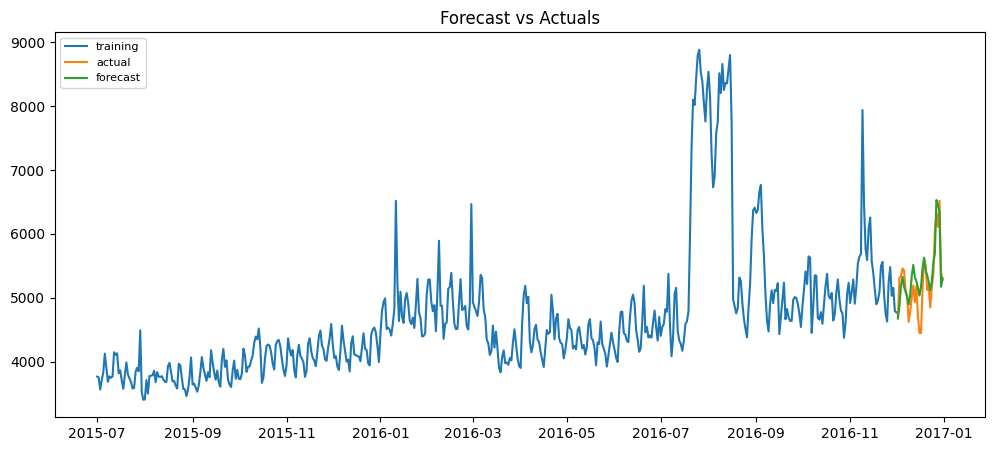

In [ ]:
import statsmodels.api as sm
train=ts[:520]
test=ts[520:]
model=sm.tsa.statespace.SARIMAX(train,order=(4, 1, 3),seasonal_order=(1,1,1,7),exog=exog[:520])
results=model.fit()

fc=results.forecast(30,dynamic=True,exog=pd.DataFrame(exog[520:]))

# Make as pandas series
fc_series = pd.Series(fc)
# Plot
train.index=train.index.astype('datetime64[ns]')
test.index=test.index.astype('datetime64[ns]')
plot.figure(figsize=(12,5), dpi=100)
plot.plot(train, label='training')
plot.plot(test, label='actual')
plot.plot(fc_series, label='forecast')

plot.title('Forecast vs Actuals')
plot.legend(loc='upper left', fontsize=8)

In [ ]:
mape = np.mean(np.abs(fc - test.values)/np.abs(test.values))
rmse = np.mean((fc - test.values)**2)**.5
print("mape:",mape)
print("rsme:",rmse)

mape: 0.0462866734689745
rsme: 291.1051339895362


Now, The mean absolute percentage error and the root mean squared error is low

# Regression model

In [ ]:
ts_df=ts.to_frame()
ts_df.head()

,en
index,
2015-07-01,3767.328604
2015-07-02,3755.158765
2015-07-03,3565.225696
2015-07-04,3711.782932
2015-07-05,3833.433025


In [ ]:
ts_df.reset_index(level=0, inplace=True)
ts_df['date']=pd.to_datetime(ts_df['index'])
ts_df.drop(['index'],axis=1,inplace=True)
ts_df.head()

,en,date
0,3767.328604,2015-07-01
1,3755.158765,2015-07-02
2,3565.225696,2015-07-03
3,3711.782932,2015-07-04
4,3833.433025,2015-07-05


In [ ]:
ts_df['day_of_week']=ts_df['date'].dt.day_name()
ts_df.head()

,en,date,ds,y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,exog,rolling_mean,day_of_week
0,3767.328604,2015-07-01,2015-07-01,3767.328604,False,False,False,False,False,False,True,0,NaN,Wednesday
1,3755.158765,2015-07-02,2015-07-02,3755.158765,False,False,False,False,True,False,False,0,NaN,Thursday
2,3565.225696,2015-07-03,2015-07-03,3565.225696,True,False,False,False,False,False,False,0,NaN,Friday
3,3711.782932,2015-07-04,2015-07-04,3711.782932,False,False,True,False,False,False,False,0,NaN,Saturday
4,3833.433025,2015-07-05,2015-07-05,3833.433025,False,False,False,True,False,False,False,0,NaN,Sunday


In [ ]:
ts_df=pd.get_dummies(ts_df, columns = ['day_of_week'])

In [ ]:
ts_df.head()

,en,date,ds,y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,3767.328604,2015-07-01,2015-07-01,3767.328604,False,False,False,False,False,False,True
1,3755.158765,2015-07-02,2015-07-02,3755.158765,False,False,False,False,True,False,False
2,3565.225696,2015-07-03,2015-07-03,3565.225696,True,False,False,False,False,False,False
3,3711.782932,2015-07-04,2015-07-04,3711.782932,False,False,True,False,False,False,False
4,3833.433025,2015-07-05,2015-07-05,3833.433025,False,False,False,True,False,False,False


In [ ]:
ts_df['exog']=ex_df['Exog']
ts_df['rolling_mean']=ts_df['en'].rolling(7).mean()

In [ ]:
ts_df=ts_df.dropna()
ts_df.head()


,en,date,ds,y,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,exog,rolling_mean,day_of_week
6,3906.341724,2015-07-07,2015-07-07,3906.341724,False,False,False,False,False,True,False,0,3809.528545,Tuesday
7,3685.854621,2015-07-08,2015-07-08,3685.854621,False,False,False,False,False,False,True,0,3797.889404,Wednesday
8,3771.183714,2015-07-09,2015-07-09,3771.183714,False,False,False,False,True,False,False,0,3800.178683,Thursday
9,3749.860313,2015-07-10,2015-07-10,3749.860313,True,False,False,False,False,False,False,0,3826.555056,Friday
10,3770.749355,2015-07-11,2015-07-11,3770.749355,False,False,True,False,False,False,False,0,3834.978831,Saturday


In [ ]:
X=ts_df[['day_of_week_Friday',	'day_of_week_Monday',	'day_of_week_Saturday',	'day_of_week_Sunday',	'day_of_week_Thursday',	'day_of_week_Tuesday',	'day_of_week_Wednesday',	'exog',	'rolling_mean']].copy()
y=ts_df[['en']]

train_x = X[:-20]
test_x = X[-20:]

train_y = y[:-20]
test_y = y[-20:]


In [ ]:
from sklearn.linear_model import LinearRegression

# Train and pred
model = LinearRegression()
model.fit(train_x, train_y)
y_pred = (model.predict(test_x))


mape = np.mean(np.abs(y_pred - test_y.values)/np.abs(test_y.values))
print("mape:",mape)


mape: 0.045239687363299905


We can see here that aur mape is better than our arima model but quite equivalent to our sarimax model when we use regression method.

# using Facebook Prophet

In [ ]:
!pip install pystan~=2.14
!pip install prophet

  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pystan
  Running setup.py clean for pystan
Failed to build pystan
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pystan)


In [ ]:
ts_df['ds']=ts_df['date']
ts_df['y']=ts_df['en']

In [ ]:
df2=ts_df[['date','en','exog']].copy()
df2.columns = ['ds', 'y', 'exog']
df2.head()

,ds,y,exog
6,2015-07-07,3906.341724,0
7,2015-07-08,3685.854621,0
8,2015-07-09,3771.183714,0
9,2015-07-10,3749.860313,0
10,2015-07-11,3770.749355,0


In [ ]:
df2[:-20].info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 6 to 529
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      524 non-null    datetime64[ns]
 1   y       524 non-null    float64       
 2   exog    524 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 16.4 KB


prophet without exogenous

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuf5sqwae/an5r2qdr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuf5sqwae/nd08hjb0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63641', 'data', 'file=/tmp/tmpuf5sqwae/an5r2qdr.json', 'init=/tmp/tmpuf5sqwae/nd08hjb0.json', 'output', 'file=/tmp/tmpuf5sqwae/prophet_modelz2tf0ebd/prophet_model-20250111145533.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:55:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:55:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


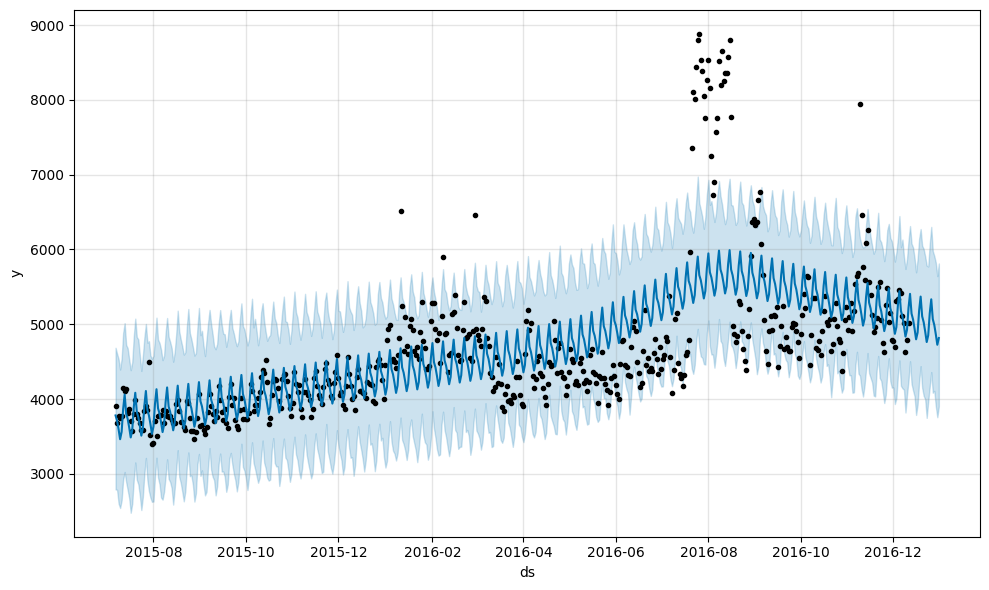

In [ ]:
from prophet import Prophet
m = Prophet(weekly_seasonality=True)
m.fit(df2[['ds', 'y']][:-20])
future = m.make_future_dataframe(periods=20,freq="D")
forecast = m.predict(future)
fig = m.plot(forecast)

prophet with exogenous

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuf5sqwae/osxfe41v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuf5sqwae/mkwhsyfk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33471', 'data', 'file=/tmp/tmpuf5sqwae/osxfe41v.json', 'init=/tmp/tmpuf5sqwae/mkwhsyfk.json', 'output', 'file=/tmp/tmpuf5sqwae/prophet_modelfvld5qmq/prophet_model-20250111145635.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:56:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:56:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


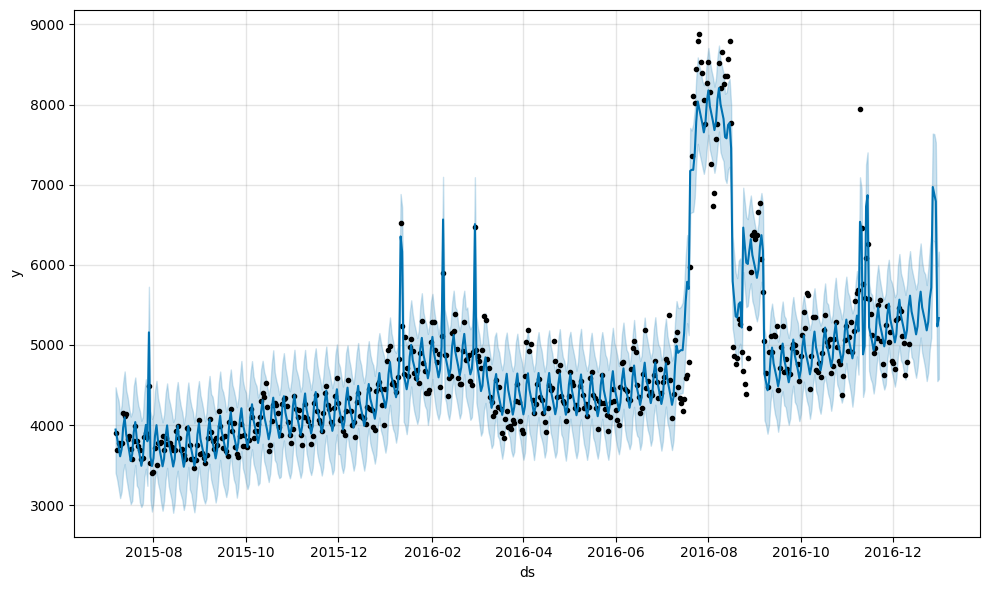

In [ ]:
model2=Prophet(interval_width=0.9, weekly_seasonality=True, changepoint_prior_scale=1)
model2.add_regressor('exog')
model2.fit(df2[:-20])
forecast2 = model2.predict(df2)
fig = model2.plot(forecast2)

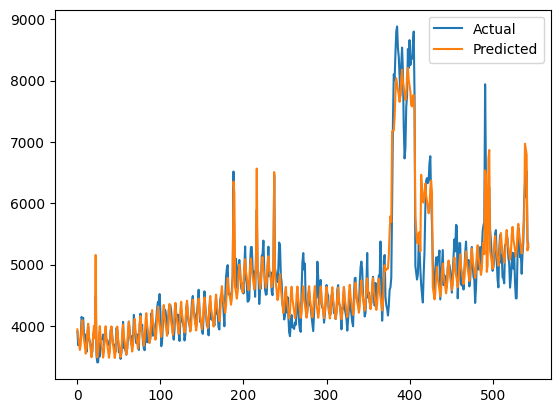

In [ ]:
y_true = df2['y'].values
y_pred = forecast2['yhat'].values

plot.plot(y_true, label='Actual')
plot.plot(y_pred, label='Predicted')
plot.legend()
plot.show()

In [ ]:

mape = np.mean(np.abs(forecast2['yhat'][-20:] - df2['y'][-20:].values)/np.abs(df2['y'][-20:].values))
print("mape:",mape)

mape: 0.06563482867071906


Similarly facebook prophet has worse mape than SARIMAX but better than ARIMA

# Comparing the predicted views for different languages

**For doing this we are going to automate the procedure from loading the separate data for each langauge to doing out of sample forecasting for the next month, and then comparing the results.**

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

def grid_search(ts):
    v = [0, 1, 2, 3]
    mape = 100
    val = [0, 0, 0]

    for p in v:
        for d in v:
            for q in v:
                try:
                    # SARIMAX model requires seasonal_order, which can be set to (p, d, q, s) where s is the seasonal period
                    model = SARIMAX(ts[:-20], order=(4, 1, 3), seasonal_order=(1, 1, 1, 7))  # seasonal_order=(p,d,q,s)
                    model_fit = model.fit(disp=-1)

                    # Forecasting the next 20 steps
                    fc = model_fit.forecast(steps=20)

                    # Calculate MAPE for the forecast
                    x = np.mean(np.abs(fc - ts[-20:].values) / np.abs(ts[-20:].values))

                    # Keep track of the best model
                    if x < mape:
                        mape = x
                        val = [p, d, q]
                except:
                    pass

    return mape, val


This functions works like a grid search for getting the best value of p,d,q by comparing the mape  of all models that we create.

the values of p,d,q that give the least mape score are saved and returned

In [ ]:
def all_arima(train, test, val):
    p, d, q = val
    try:
        # Define the SARIMAX model
        model = SARIMAX(train, order=(4, 1, 3), seasonal_order=(1, 1, 1, 7))  # Adjust seasonal_order if needed
        model_fit = model.fit(disp=False)

        # Forecast the test period
        forecast = model_fit.forecast(steps=len(test))

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.plot(train, label="Train", color="blue")
        plt.plot(test, label="Test", color="green")
        plt.plot(test.index, forecast, label="Forecast", color="orange")
        plt.title(f"Forecast for SARIMAX({p}, {d}, {q})")
        plt.xlabel("Time")
        plt.ylabel("Values")
        plt.legend(loc="upper left")
        plt.show()

        return forecast
    except Exception as e:
        print(f"Error in all_arima: {e}")
        return None


Language: de
Best MAPE: 0.08565619220147494, Parameters: [0, 0, 0]


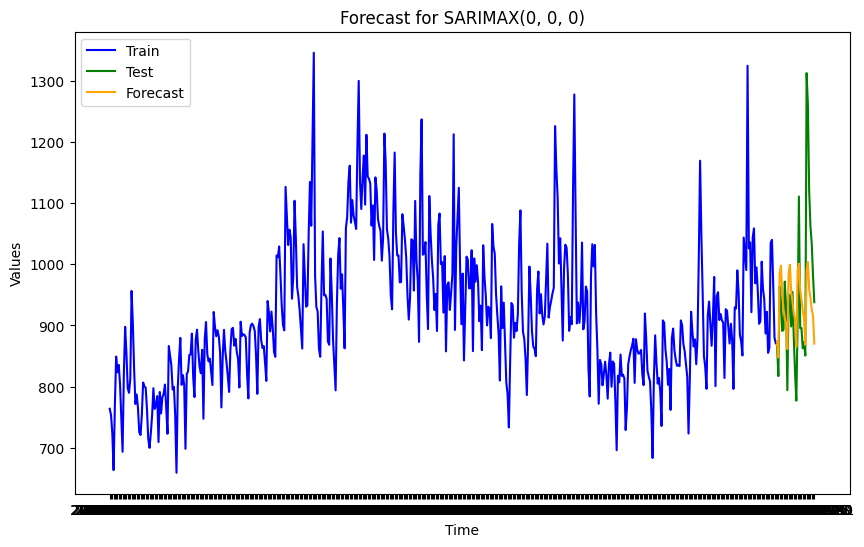

Language: en
Best MAPE: 0.0524978735098228, Parameters: [0, 0, 0]


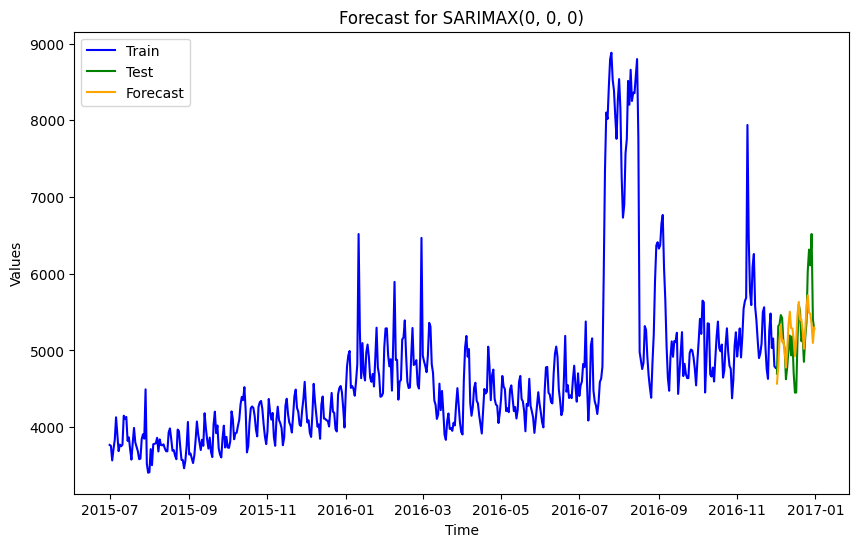

Language: es
Best MAPE: 0.08368147552322913, Parameters: [0, 0, 0]


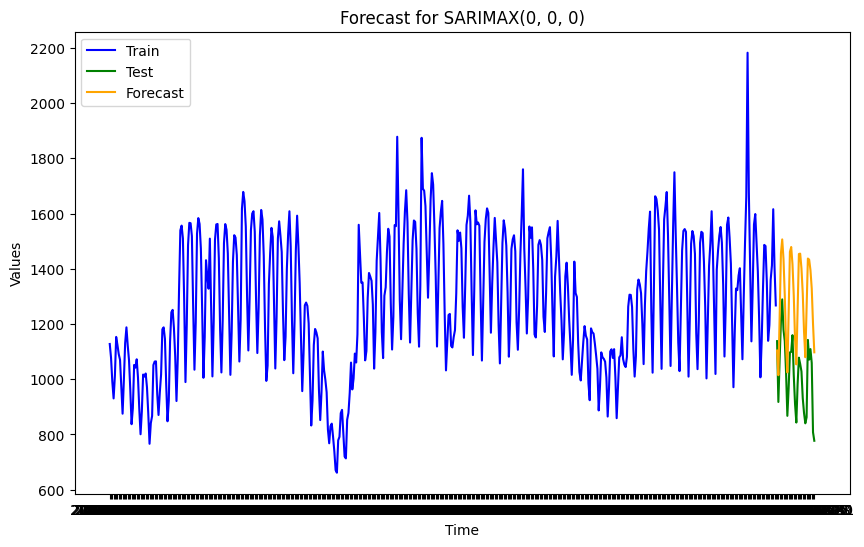

Language: fr
Best MAPE: 0.07763264682472287, Parameters: [0, 0, 0]


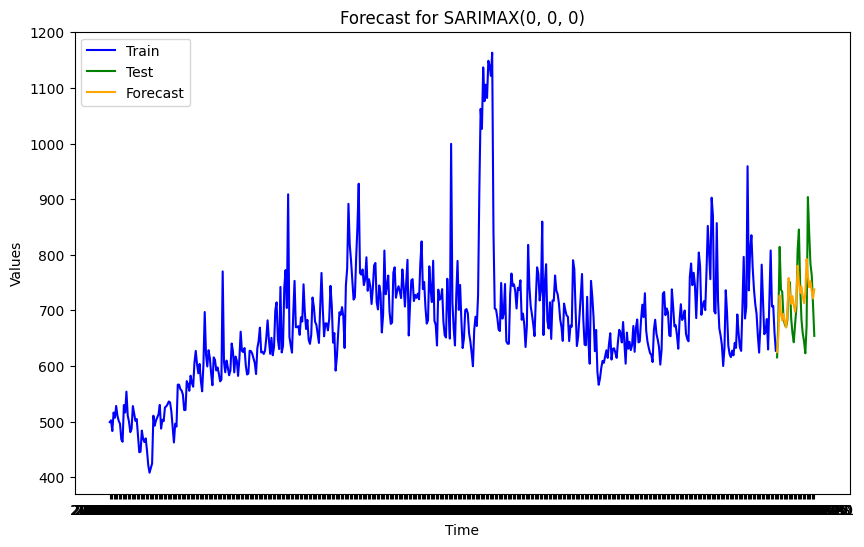

Language: ja
Best MAPE: 0.08918473763299561, Parameters: [0, 0, 0]


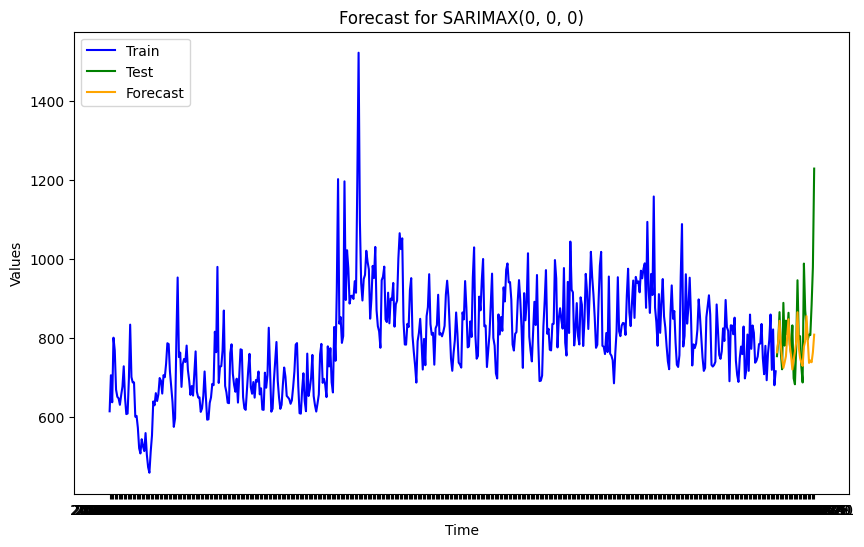

Language: no_lang
Best MAPE: 0.07820797837050644, Parameters: [0, 0, 0]


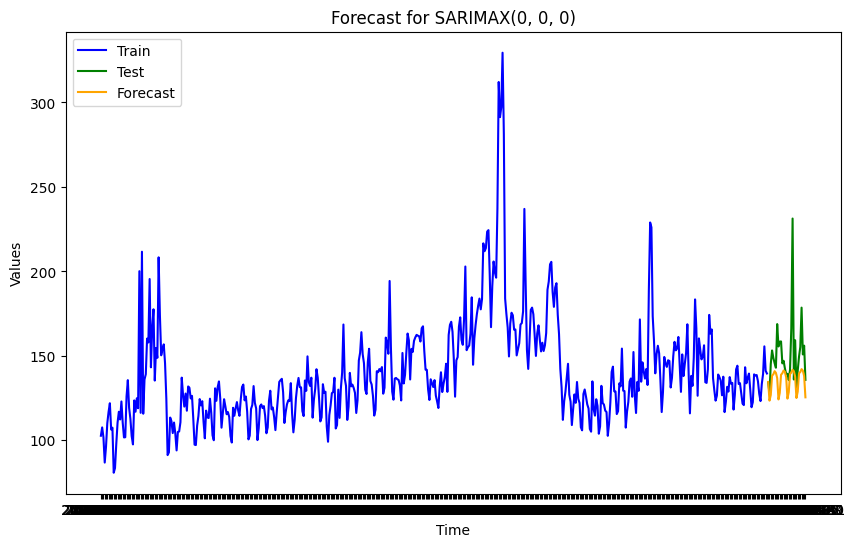

Language: ru
Best MAPE: 0.0465954016571809, Parameters: [0, 0, 0]


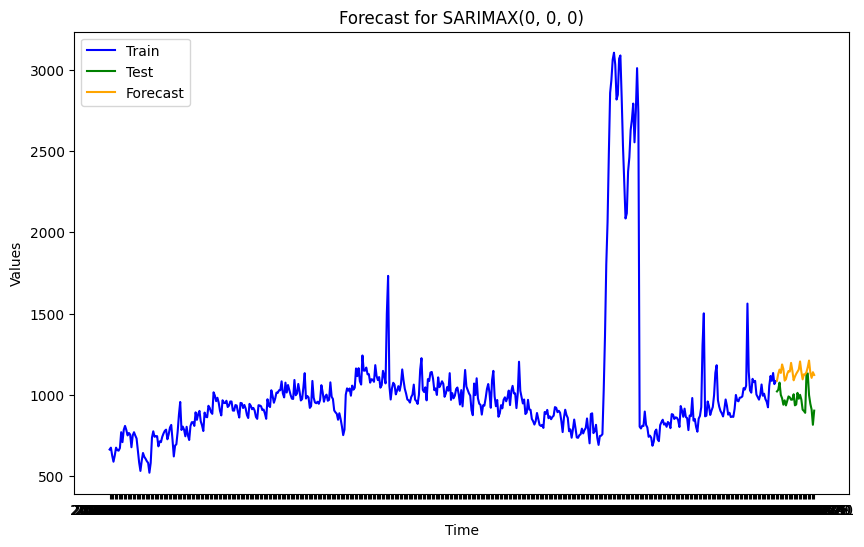

Language: zh
Best MAPE: 0.05898638993770742, Parameters: [0, 0, 0]


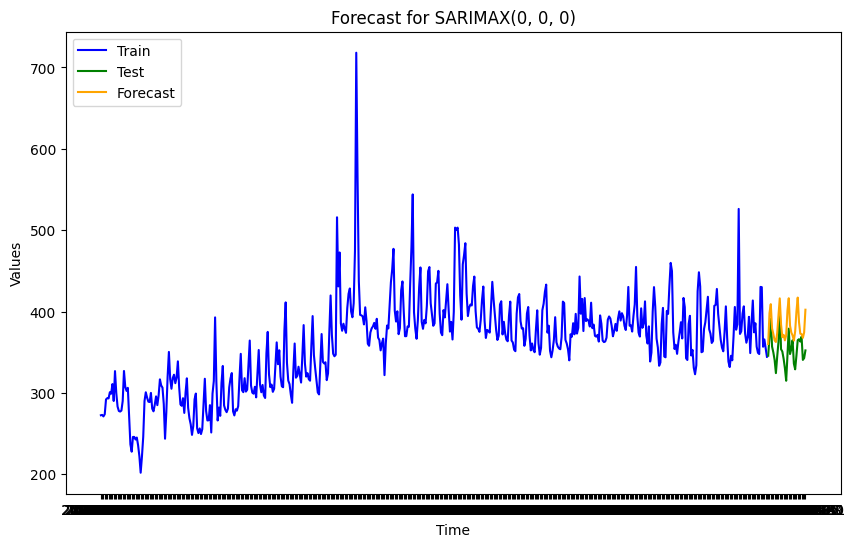

In [ ]:
import warnings
warnings.filterwarnings("ignore")

views_prediction = {}
for c in total_view:
    print("Language:", c)
    ts = total_view[c]  # Extract time series for the current language

    # Ensure ts is a pandas Series and drop missing values
    ts = ts.dropna()

    # Perform grid search to find the best parameters
    mape, val = grid_search(ts)
    print(f"Best MAPE: {mape}, Parameters: {val}")

    # Split into train and test
    train = ts[:520]
    test = ts[520:]

    # Use all_arima to forecast and visualize results
    forecast = all_arima(train, test, val)

    # Store predictions
    views_prediction[c] = forecast


* This function is what calls and drives all the other functions.

* It first gets the data for a particular language.

* checks stationarity.

* Gets the optimal p,d,q values from grid search

* uses that value to train the model, forecast and plot it
